In [3]:
%load_ext autoreload
%autoreload 2

import os
import sys
HLA_associations_path = os.path.abspath("../")
sys.path.append(HLA_associations_path)

import numpy as np
import pandas as pd
import scipy.stats as stats

import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.notebook import tqdm

import constants, index_tools, data_tools, medical_code_tools
from utilities import *
from analysis import *

import sys
sys.path.append(constants.GRANTHAM_DISTANCE_PATH)

import grantham_distance as gd

In [4]:
sns.set_palette("tab10")
plt.rcParams.update({'figure.max_open_warning': 0})

In [5]:
loaded = False

# Load BioBank Components

In [24]:
DEV_MODE = False
SIGNIFIER = ""

if not loaded:
    (biobank_data_no_HLA_alleles, biobank_index,
     med_code_mapping) = data_tools.load_all_biobank_components(DEV_MODE, signifier=SIGNIFIER)
    loaded = True
    HLA_alleles = data_tools.load_HLA_data()
    biobank_data = biobank_data_no_HLA_alleles.merge(HLA_alleles, how="left", on="eid")

Importing BioBank Index and Data:
Missing 0 biobank index names
Reduced feature set has 376 features.
UK BioBank Data Loaded.
Size: 502536 rows x 376 columns
Elapsed time: 50.1748 seconds


Mapping Medical Codes:   0%|          | 0/361 [00:00<?, ? feature/s]

# All illnesses

In [25]:
data = biobank_data.sample(10000)

In [26]:
illness_codes = [feature for feature in biobank_data.columns if get_base_feature(feature) == "illness_code"]
all_illnesses = biobank_data[illness_codes].values.ravel()
all_illnesses, counts = np.unique(all_illnesses[~pd.isnull(all_illnesses)], return_counts=True)

In [27]:
illness_dict = {}
for illness in tqdm(all_illnesses):
    illness_dict[illness] = get_illness_value(data, illness, "illness_code")

  0%|          | 0/444 [00:00<?, ?it/s]

In [28]:
illness_data = pd.concat([data[["eid", "sex", "birth_year"]], pd.DataFrame(illness_dict)], axis=1)

In [29]:
illness_graph = np.zeros((len(all_illnesses), len(all_illnesses)))

In [30]:
for i, illness in enumerate(all_illnesses):
    illness_values = illness_data[illness].values
    for j, associated_illness in enumerate(all_illnesses):
        illness_graph[i, j] = np.sum(illness_values | illness_data[associated_illness].values)

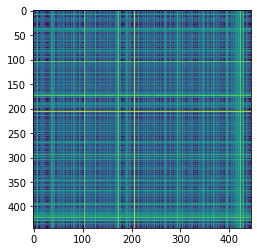

In [31]:
plt.imshow(np.log10(illness_graph + 1))

In [66]:
import networkx as nx
import pyvis.network as net

In [67]:
g = net.Network(notebook=True)

In [71]:
nxg = nx.from_numpy_matrix(illness_graph)

In [76]:
net = Network(notebook=True)
net.from_nx(nxg)

KeyboardInterrupt: 

In [32]:
a = np.random.randn(1000, 10000)

reducer = umap.UMAP()
embedding = reducer.fit_transform(illness_data[all_illnesses].values * 1)

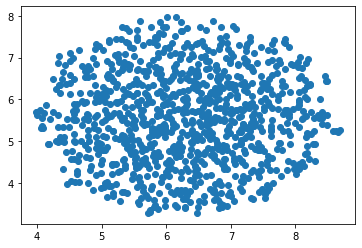

In [23]:
plt.scatter(embedding[:, 0], embedding[:, 1])

In [2]:
import umap

In [ ]:
net.show("example.html")

In [42]:
illness_data[all_illnesses]


,abdominal hernia,abnormal smear (cervix),acne/acne vulgaris,acromegaly,acute infective polyneuritis/guillain-barre syndrome,adrenal tumour,adrenocortical insufficiency/addison's disease,alcohol dependency,alcoholic liver disease / alcoholic cirrhosis,allergy or anaphylactic reaction to drug,...,varicose veins,vasculitis,venous thromboembolic disease,vertigo,vitiligo,vocal cord polyp,wegners granulmatosis,whooping cough / pertussis,wolff parkinson white / wpw syndrome,yellow fever
329278,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
299053,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
215342,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
341424,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
88238,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
463828,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
359066,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
242371,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
211597,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


# Don't rerun above